[*********************100%***********************]  1 of 1 completed


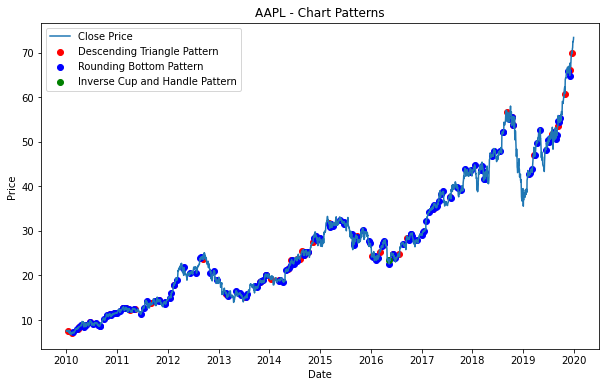

[*********************100%***********************]  1 of 1 completed


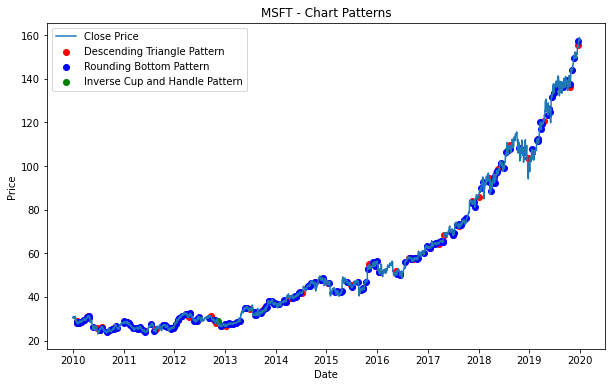

[*********************100%***********************]  1 of 1 completed


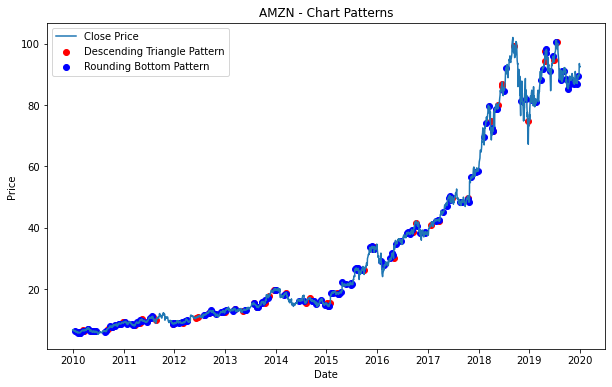

[*********************100%***********************]  1 of 1 completed


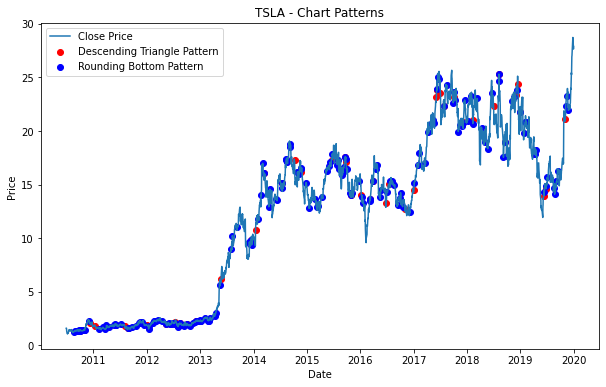

[*********************100%***********************]  1 of 1 completed


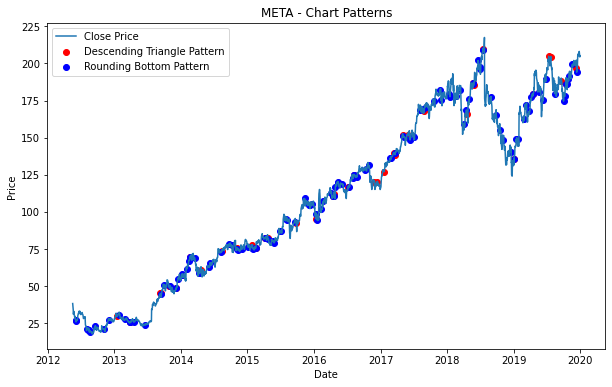

[*********************100%***********************]  1 of 1 completed


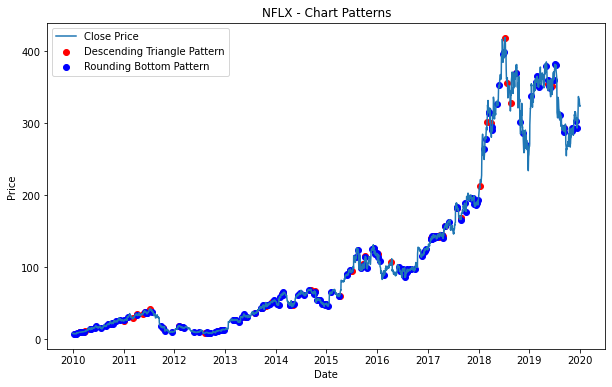

[*********************100%***********************]  1 of 1 completed


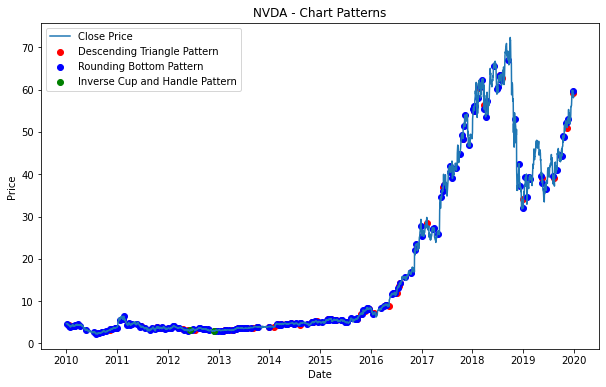

[*********************100%***********************]  1 of 1 completed


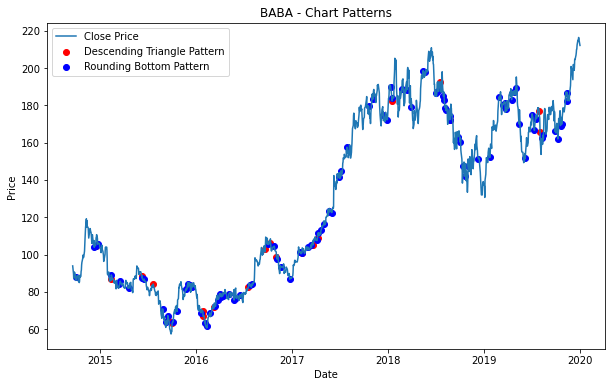

[*********************100%***********************]  1 of 1 completed


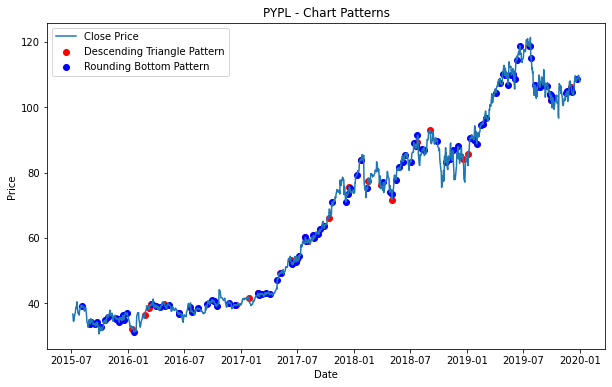

[*********************100%***********************]  1 of 1 completed


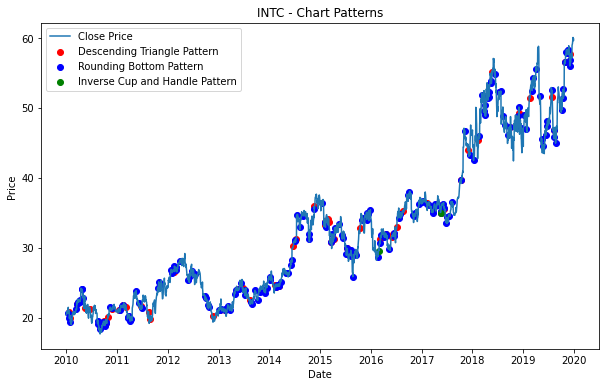

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the list of stocks
stocks = ['AAPL', 'MSFT', 'AMZN', 'TSLA', 'META', 'NFLX', 'NVDA', 'BABA', 'PYPL', 'INTC']

# Define the start and end dates
start_date = "2010-01-01"
end_date = "2020-01-01"

# Download historical stock data and implement patterns for each stock
for stock in stocks:
    # Download stock data
    stock_data = yf.download(stock, start=start_date, end=end_date)[['High', 'Low', 'Close']].copy()
    
    # Calculate rolling maximum and minimum based on window sizes
    stock_data['rolling_max'] = stock_data['High'].rolling(window=3).max()
    stock_data['rolling_min'] = stock_data['Low'].rolling(window=3).min()
    
    # Descending Triangle Pattern
    descending_triangle_data = stock_data[(stock_data['rolling_max'] <= stock_data['High']) & (stock_data['rolling_min'] >= stock_data['Low'])]
    
    # Rounding Bottom Pattern
    rolling_max_shifted = stock_data['rolling_max'].shift(-1)
    rolling_min_shifted = stock_data['rolling_min'].shift(-1)
    rounding_bottom_data = stock_data[(stock_data['rolling_min'] == rolling_min_shifted) & (stock_data['rolling_max'] == rolling_max_shifted)]
    
    # Inverse Cup and Handle Pattern
    sma50 = stock_data['Close'].rolling(window=50).mean()
    sma200 = stock_data['Close'].rolling(window=200).mean()
    inverse_cup_handle_pattern = (stock_data['Close'] < sma50) & (sma50 < sma200) & (stock_data['Close'].shift(25).rolling(window=50).min() == stock_data['Close'])
    inverse_cup_handle_data = stock_data[inverse_cup_handle_pattern]
    
    # Plotting the patterns
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
    
    if not descending_triangle_data.empty:
        plt.scatter(descending_triangle_data.index, descending_triangle_data['Close'], color='red', label='Descending Triangle Pattern')
    
    if not rounding_bottom_data.empty:
        plt.scatter(rounding_bottom_data.index, rounding_bottom_data['Close'], color='blue', label='Rounding Bottom Pattern')
    
    if not inverse_cup_handle_data.empty:
        plt.scatter(inverse_cup_handle_data.index, inverse_cup_handle_data['Close'], color='green', label='Inverse Cup and Handle Pattern')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{stock} - Chart Patterns')
    plt.legend()
    plt.show()
